I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [26]:
import numpy as np
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
l=np.linspace(0,np.pi/2)
t=[]
for i in l:
  m=integrate.quad(lambda x: 1/(np.sqrt(1-(np.sin(x)**2)*(np.sin(i/2)**2))), 0, np.pi/2)[0]
  w=(2/np.pi)*m
  t.append(w)



In [61]:
T=pd.DataFrame(data=t,columns=['T/T0'])

In [62]:
T['Rad']=l
T['Deg']=l*180/np.pi
T

,T/T0,Rad,Deg
0,1.000000,0.000000,0.000000
1,1.000064,0.032057,1.836735
2,1.000257,0.064114,3.673469
3,1.000578,0.096171,5.510204
4,1.001029,0.128228,7.346939
5,1.001608,0.160285,9.183673
6,1.002317,0.192342,11.020408
7,1.003156,0.224399,12.857143
8,1.004126,0.256457,14.693878
9,1.005227,0.288514,16.530612


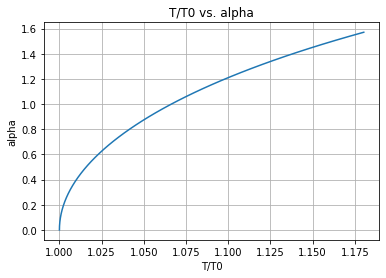

In [70]:
plt.plot(t,l)
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('alpha')
plt.title('T/T0 vs. alpha');

En la primera integral dada, cualquier evaluación numérica fallaría porque es una integral impropia, que presenta una discontinuidad en $\alpha$.

Al hacer el cambio de variable, y hacer $\alpha$ = 0, se tiene que el periodo para pequeñas oscilaciones es igual al periodo para grandes oscilaciones, esto es, $\phi$ es un ángulo "pequeño".

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$

2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [73]:
np.random.seed(1000902069)
p=np.random.uniform(0,2*np.pi)


In [77]:
def R(r):
  return np.array([[np.cos(r),np.sin(r)],
                  [-np.sin(r), np.cos(r)]])
  
R(p)

array([[-0.99378224,  0.11134116],
       [-0.11134116, -0.99378224]])

In [82]:
D=np.diag([2,4])
D

array([[2, 0],
       [0, 4]])

In [96]:
D_= np.sqrt(D).round(3)
D_

array([[1.414, 0.   ],
       [0.   , 2.   ]])

In [88]:
q=np.random.uniform(0,np.pi/4)
def U(r):
  return np.array([[np.cos(r),np.sin(r)],
                  [-np.sin(r), np.cos(r)]])

In [89]:
U(q)

array([[ 0.92967962,  0.36836912],
       [-0.36836912,  0.92967962]])

In [101]:
UT=np.transpose(U(q))
UT

array([[ 0.92967962, -0.36836912],
       [ 0.36836912,  0.92967962]])

In [97]:
Y=np.dot(R(p),np.dot(D_,UT))
Y

array([[-1.22436404,  0.72465847],
       [-0.87852279, -1.78980349]])

In [98]:
A=np.dot(np.transpose(Y),Y)
A

array([[2.27086958, 0.68513737],
       [0.68513737, 3.72852642]])

In [100]:
np.linalg.eig(A)

(array([1.999396, 4.      ]), array([[-0.92967962, -0.36836912],
        [ 0.36836912, -0.92967962]]))

Efectivamente, tiene los valores y vectores propios adecuados.